In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def hypothesis(X, a, b):
    # X shape = (1, num_examples)
    return a*X+b

    

In [4]:
def compute_cost(target, hypo):
    residual = np.square((hypo-target))
    return (1/(2*hypo.shape[1]))*np.sum([element for element in residual])


In [5]:
def cost_derivative(a, b, hypo, target, X):
    b_derivative = (1/hypo.shape[1])*np.sum(hypo-target)
    a_derivative = float((1/hypo.shape[1])*(np.dot(X,(hypo-target).T)))
    return a_derivative, b_derivative


In [6]:
def gradient_descent(a, b, b_derivative, a_derivative, learning_rate = 0.01):
    return a-learning_rate*a_derivative, b-learning_rate*b_derivative

In [11]:
def main(data, num_iter = 1000):
    a, b = np.random.random(), np.random.random()
    X = np.reshape(data[0,:], (1, data[0,:].shape[0]))
    target = np.reshape(data[1,:], (1, data[1,:].shape[0]))
    for i in range(num_iter):
        hypo = np.reshape(hypothesis(X, a, b), (1, X.shape[1]))
        cost = compute_cost(target, hypo)
        a_derivative, b_derivative = cost_derivative(a, b, hypo,target, X)
        a, b = gradient_descent(a, b, b_derivative, a_derivative, learning_rate = 0.0003)
    return a, b

In [ ]:
%matplotlib inline
'''y_values = []
for i in range(0,20):
    n = random.randint(1,100)
    y_values.append(n)
x_values = [i for i in range(20)]'''
x_values = [6, 6, 6, 4, 7, 4, 6, 5, 6, 4, 6, 5 ]
y_values = [7, 6, 5, 5, 6, 3, 7, 7, 5, 4, 5, 7]
x = np.array([x_values, y_values])
a, b = main(x, 100000)
print('f(x) = '+str(a)+'x '+ str(b))
plt.plot(x_values, np.dot(a,x_values)+b)
plt.scatter(x_values,y_values)
plt.show()


In [8]:
def explicit_normal_eqn(x, y):
    x = np.array(x)
    y = np.array(y)
    x = np.reshape(x, (x.shape[0],1))
    y = np.reshape(y, (y.shape[0],1))
    x_bias = np.ones((x.shape[0],1))
    x = np.append(x_bias,x,axis=1)
    temp1 = np.linalg.inv(np.transpose(x).dot(x))
    temp2=np.transpose(x).dot(y)
    theta =temp1.dot(temp2)
    return theta[0][0], theta[1][0]
    

f(x) = 0.6488549618320576x + 2.068702290076345


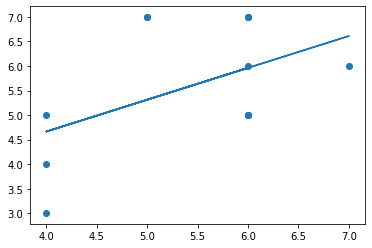

In [17]:
X = [6, 6, 6, 4, 7, 4, 6, 5, 6, 4, 6, 5 ]
y =[7, 6, 5, 5, 6, 3, 7, 7, 5, 4, 5, 7]
a, b = explicit_normal_eqn(X, y)
print('f(x) = '+str(b)+'x + '+ str(a))
plt.scatter(X, y)
plt.plot(np.reshape(np.array(X), (np.array(X).shape[0], 1)), np.dot(b, np.array(X))+a)
plt.show()
